In [1]:
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
path_to_data = '/scratch/spf248/twitter/data'
tweets=pq.ParquetDataset(glob(os.path.join(path_to_data,
                                           'classification',
                                           country_code,'labeling',
                                           '*.parquet'))).read().to_pandas()
import pandas as pd
labels = pd.read_csv('/scratch/spf248/twitter/data/classification/US/labeled/labels.csv')

In [3]:
print(tweets.dtypes)
tweets['tweet_id'] = pd.to_numeric(tweets['tweet_id'], downcast='integer')
tweets

tweet_id    object
text        object
keyword     object
target      object
dtype: object


,tweet_id,text,keyword,target
0,730444383636459522,"I just got laid off, I think I cried a little ...",laid_off,target_i_lost_my_job_today
1,387294960120107009,Laid off and had to sell my 2 tickets to @Pink...,laid_off,target_i_lost_my_job_today
2,282411950724505600,"I wasn't fired from my job, I was laid off. Yo...",laid_off,target_i_lost_my_job_today
3,704676467393736705,I feel like I lost my job. I didn’t get laid o...,laid_off,target_i_lost_my_job_today
4,748041925702332417,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,laid_off,target_i_lost_my_job_today
...,...,...,...,...
9795,418875619661725696,Anyone know of places hiring serving/hosting p...,position,target_anyone_hiring
9796,291207775500001280,Hello! I am currently seeking an Executive Ass...,position,target_anyone_hiring
9797,595590216255086592,Looking for work? Job fair seeks to fill 101 p...,position,target_anyone_hiring
9798,613832234143866880,is anyone interested in working for Honda ? hm...,position,target_anyone_hiring


In [4]:
labels

,tweet_id,1,2,3,4,5
0,278519817328279552,yes,no,yes,no,no
1,278534362910322688,no,no,yes,no,no
2,278721173192314880,no,no,no,unsure,no
3,278908360852639744,no,no,no,no,no
4,278988941837873152,yes,no,no,no,no
...,...,...,...,...,...,...
5019,1076515097843949568,no,no,no,no,no
5020,1077327152817684480,no,no,no,no,yes
5021,1077682947258384384,no,no,no,no,yes
5022,1079020674377629701,no,no,no,no,yes


In [17]:
# classes = {'1': 'Does this tweet indicate that the user is currently unemployed?',
#  '2': 'Does this tweet indicate that the user became unemployed within the last month?',
#  '3': 'Does this tweet indicate that the user is currently searching for a job?',
#  '4': 'Does this tweet indicate that the user was hired within the last month?',
#  '5': 'Does this tweet contain a job offer?'}

In [9]:
# training_data = tweets.join(labels, lsuffix='tweet_id', rsuffix='tweet_id')
training_data = pd.merge(tweets, labels, how='inner', on='tweet_id')
training_data = training_data[['text', '1', '2', '3', '4', '5']]
print(training_data.dtypes)
# training_data[['1', '2', '3', '4', '5']] = training_data[['1', '2', '3', '4', '5']].replace('unsure', 'no')
print(pd.unique(training_data['2']))
training_data

text    object
1       object
2       object
3       object
4       object
5       object
dtype: object
['yes' 'no' 'unsure']


,text,1,2,3,4,5
0,"I just got laid off, I think I cried a little ...",yes,yes,no,no,no
1,Laid off and had to sell my 2 tickets to @Pink...,yes,no,no,no,no
2,"I wasn't fired from my job, I was laid off. Yo...",yes,no,no,no,no
3,I feel like I lost my job. I didn’t get laid o...,no,no,no,no,no
4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,no,yes,no,yes,no
...,...,...,...,...,...,...
5019,Got hired today!!!,no,no,no,yes,no
5020,Looking to get hired? Avoid these pitfalls htt...,no,no,no,no,no
5021,WOOOO one step closer to not being unemployed!...,yes,no,no,yes,no
5022,Anyone looking for a part time position in the...,no,no,no,no,yes


In [6]:
training_data[['1', '2', '3', '4', '5']] = training_data[['1', '2', '3', '4', '5']].replace('yes', 1)
training_data[['1', '2', '3', '4', '5']] = training_data[['1', '2', '3', '4', '5']].replace('no', 0)

In [10]:
training_data.columns = ['text', "is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]
# label_cols = ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]

In [11]:
training_data['text'] = training_data['text'].str.replace(',', '')
training_data['text'] = training_data['text'].str.replace("'","")
training_data['text'] = training_data['text'].str.replace('"','')
training_data['text'] = training_data['text'].str.replace('\n','',regex=True)
training_data['text'] = training_data['text'].str.replace('\r','',regex=True) # very important! apparently another way to create newlines that confuses the csv reader later!

training_data

,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,I just got laid off I think I cried a little i...,yes,yes,no,no,no
1,Laid off and had to sell my 2 tickets to @Pink...,yes,no,no,no,no
2,I wasnt fired from my job I was laid off. You ...,yes,no,no,no,no
3,I feel like I lost my job. I didn’t get laid o...,no,no,no,no,no
4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,no,yes,no,yes,no
...,...,...,...,...,...,...
5019,Got hired today!!!,no,no,no,yes,no
5020,Looking to get hired? Avoid these pitfalls htt...,no,no,no,no,no
5021,WOOOO one step closer to not being unemployed!...,yes,no,no,yes,no
5022,Anyone looking for a part time position in the...,no,no,no,no,yes


In [11]:
# training_data['id'] = training_data.index
training_data.index.name='id'
# training_data = training_data.reset_index(drop=True)
training_data.reset_index(inplace=True)
training_data

,id,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,0,I just got laid off I think I cried a little i...,1,1,0,0,0
1,1,Laid off and had to sell my 2 tickets to @Pink...,1,0,0,0,0
2,2,I wasnt fired from my job I was laid off. You ...,1,0,0,0,0
3,3,I feel like I lost my job. I didn’t get laid o...,0,0,0,0,0
4,4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,0,1,0,1,0
...,...,...,...,...,...,...,...
3681,3681,Got hired today!!!,0,0,0,1,0
3682,3682,Looking to get hired? Avoid these pitfalls htt...,0,0,0,0,0
3683,3683,WOOOO one step closer to not being unemployed!...,1,0,0,1,0
3684,3684,Anyone looking for a part time position in the...,0,0,0,0,1


In [13]:
import pandas as pd
# temp = pd.read_csv('/scratch/da2734/twitter/mturk_mar6/data/train.csv',lineterminator='\n')
temp = pd.read_csv('/scratch/da2734/twitter/mturk_mar6/data/train.csv')

temp

,id,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,0,I just got laid off I think I cried a little i...,1,1,0,0,0
1,1,Laid off and had to sell my 2 tickets to @Pink...,1,0,0,0,0
2,2,I wasnt fired from my job I was laid off. You ...,1,0,0,0,0
3,3,I feel like I lost my job. I didn’t get laid o...,0,0,0,0,0
4,4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,0,1,0,1,0
...,...,...,...,...,...,...,...
2943,2943,So my position was eliminated last week now I ...,1,1,0,0,0
2944,2944,This is what you get when you dont plan anythi...,0,0,0,0,0
2945,2945,Well I thought that til I read the deposition ...,0,0,0,0,0
2946,2946,Somehow I did not tweet about Grace Hoppers bi...,0,0,0,0,0


In [12]:
training_data

,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,I just got laid off I think I cried a little i...,yes,yes,no,no,no
1,Laid off and had to sell my 2 tickets to @Pink...,yes,no,no,no,no
2,I wasnt fired from my job I was laid off. You ...,yes,no,no,no,no
3,I feel like I lost my job. I didn’t get laid o...,no,no,no,no,no
4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,no,yes,no,yes,no
...,...,...,...,...,...,...
5019,Got hired today!!!,no,no,no,yes,no
5020,Looking to get hired? Avoid these pitfalls htt...,no,no,no,no,no
5021,WOOOO one step closer to not being unemployed!...,yes,no,no,yes,no
5022,Anyone looking for a part time position in the...,no,no,no,no,yes


In [36]:
from plotnine import *

# ggplot(training_data) + geom_bar(aes(x='is_unemployed'))
ggplot(training_data) + geom_bar(aes(x = reorder('is_unemployed', order)))



NameError: name 'reorder' is not defined

In [33]:
import matplotlib.pyplot as plt

order = ['no', 'unsure', 'yes']

for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:

    ggplot(training_data) + geom_bar(aes(x=column))

#     break

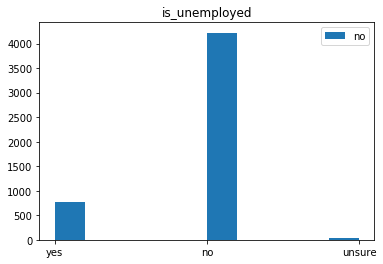

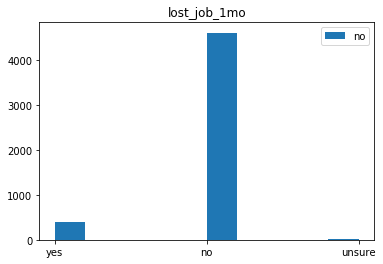

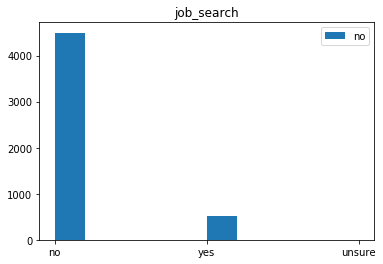

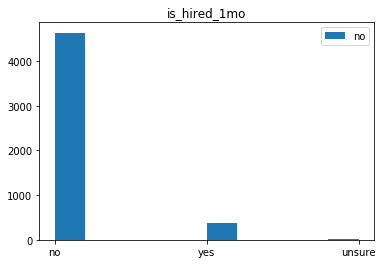

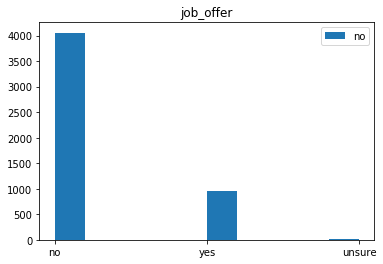

In [21]:
import matplotlib.pyplot as plt

order = ['no', 'unsure', 'yes']

for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:
    fig = plt.figure()
    ax = plt.subplot(111)
    
#     plt.hist(training_data[column],density = True)
    plt.hist(training_data[column], label = order)
    plt.savefig('../mturk_mar6/data/summary_bar_{}.png'.format(column))

    plt.title(column)
    ax.legend()

In [12]:
train, val = training_data[:int(.80*training_data.shape[0])], training_data[-int(.20*training_data.shape[0]):]
train.to_csv('/scratch/da2734/twitter/mturk_mar6/data/train.csv',index=False)
val.to_csv('/scratch/da2734/twitter/mturk_mar6/data/val.csv',index=False)